# Week 5 XAI Assignment

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](#TODO ADD LINK)

Introduction : For this assignment, I am making use of the UCI Abalone dataset which can be found here - https://archive.ics.uci.edu/dataset/1/abalone

I chose this dataset because it has highly related features so it would be suitable to understand more about PDP, ICE and ALE plots.

In [60]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd  

# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
df = abalone.data.features 
y = abalone.data.targets

print(df.head())
print(y.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
   Rings
0     15
1      7
2      9
3     10
4      7


In [ ]:
# Let us now check for missing values

print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


In [ ]:
# Let us now check for duplicates

print(df.duplicated().sum())

0


# EDA to see how the features are collinear

1. Using VIF test
2. Using a correlation heatmap

Let us first perform the VIF test first.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Prepare data for VIF calculation
X = df.copy()

# encode sex

X['Sex'] = LabelEncoder().fit_transform(X['Sex'])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# this code snippet was generated using ChatGPT 5 on 27th September at 4:23pm.

          Feature         VIF
0             Sex    2.555356
1          Length  700.488988
2        Diameter  749.121626
3          Height   42.128924
4    Whole_weight  421.652484
5  Shucked_weight  101.674946
6  Viscera_weight   63.585627
7    Shell_weight   81.873737


As expected, the features are highly correlated. For example, Whole_Weight is the whole weight of the Abalone but the shucked_weight is the weight after shucking. Let us 

/var/folders/xf/_z9gchp17vg5fnqvj_slpl_m0000gn/T/ipykernel_37096/712164038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = label_encoder.fit_transform(df['Sex'])


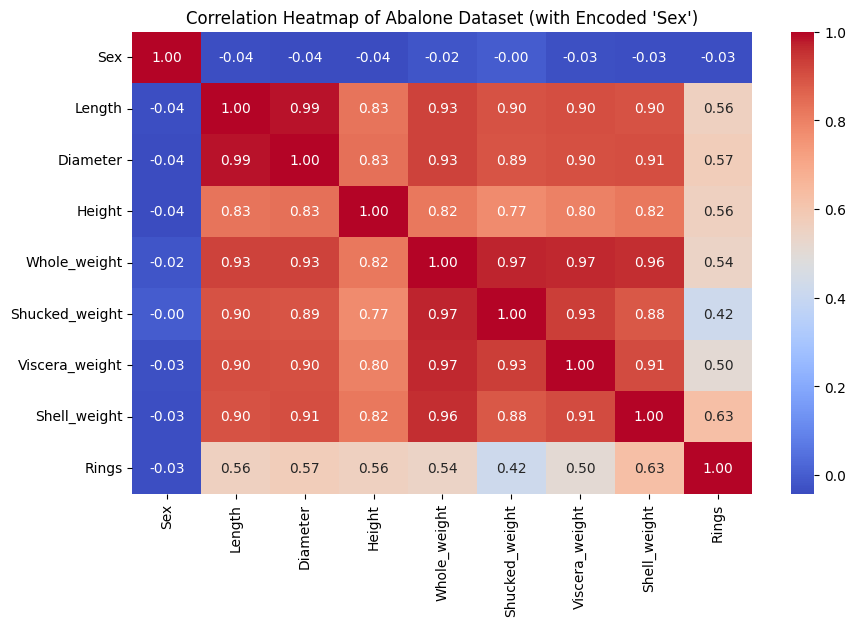

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

# Encode categorical column 'Sex'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Scale numerical features (excluding target)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

# Add target column back
scaled_df['Rings'] = y.values

# Correlation matrix
corr_matrix = scaled_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Abalone Dataset (with Encoded 'Sex')")
plt.show()


# this code snippet was generated using ChatGPT 5 on 27th September at 5:11pm.

Again, the correlation heatmap shows that the features are highly correlated. Let's focus on Whole weight and shucked weight and do a scatter plot for that.

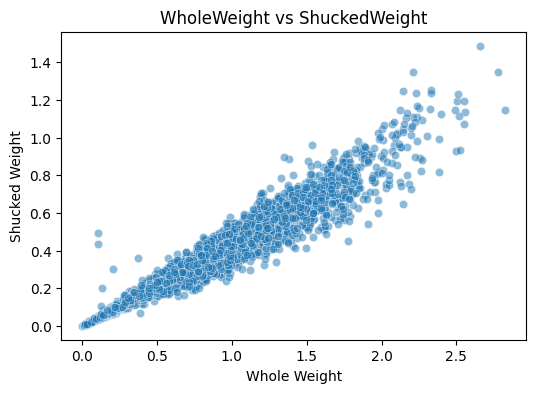

In [65]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Whole_weight"], y=df["Shucked_weight"], alpha=0.5)
plt.xlabel("Whole Weight")
plt.ylabel("Shucked Weight")
plt.title("WholeWeight vs ShuckedWeight")
plt.show()

Scatter plot shows confirms correlation.

# Model training

Let us train a Random Forest Regressor for this data. We have already scaled and encoded the features, now we can go ahead and split the data and create a model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = pd.DataFrame(scaled_features, columns=df.columns)

# Target
y = y['Rings']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make sure train/test are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



# this code snippet was generated using ChatGPT 5 on 27th September at 5:21pm.

RandomForestRegressor(random_state=42)

# PDP 

PDP keeps all other features constant and varies a single feature. It then takes an average across all instances and tells us how the predicted feature varies and is affected.

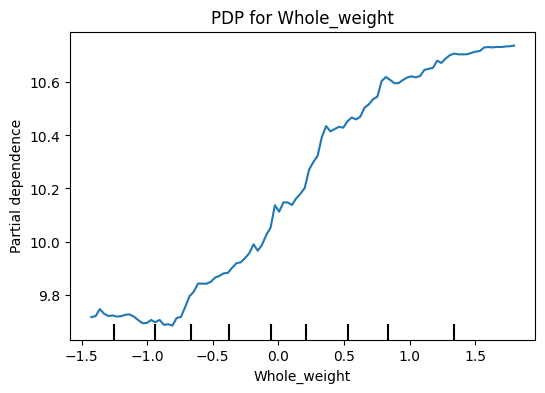

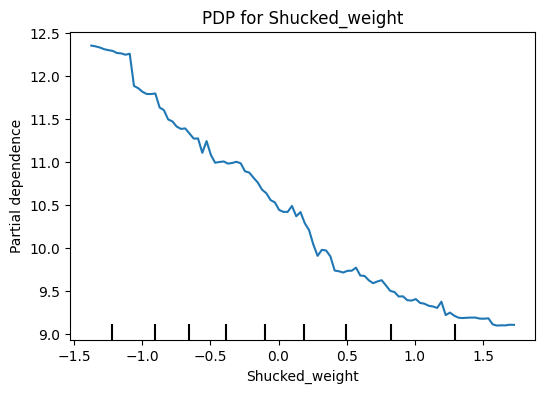

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# PDP for Whole_weight
fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['Whole_weight'],
    kind="average",
    ax=ax
)
plt.title("PDP for Whole_weight")
plt.show()


# PDP for Shucked_weight
fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['Shucked_weight'],
    kind="average",
    ax=ax
)
plt.title("PDP for Shucked_weight")
plt.show()

# this code snippet was generated using ChatGPT 5 on 27th September at 5:37pm.


# Interpreting the PDP plots

1. For whole weight

The rag plot lines show good amount of data density along the x axis. This increases the reliability of the plot. The PDP plot is indicating that as whole weight increases the age of the abalone is seen to increase which makes sense as an older abalone is heavier. 

2. For Shucked weight

The rag plot lines show good amount of data density along the x axis. This increases the reliability of the plot. The PDP plot is indicating that as shucked weight increases the age of the abalone is seen to decrease. This is kind of confusing as PDP considers the two features (Whole weight and shucked weight) to be independent. 

# ICE plots

While PDP looks at average value of the feature across instances, ICE plots show how each instance varies with a change in a specific feature. 

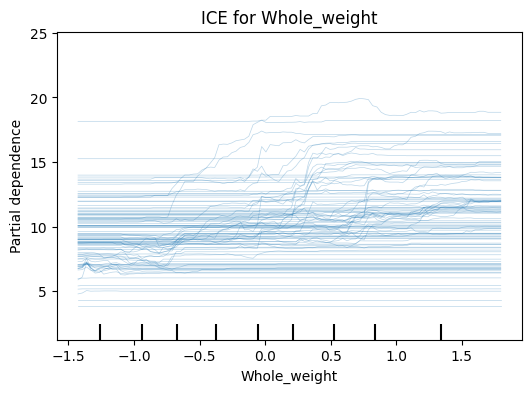

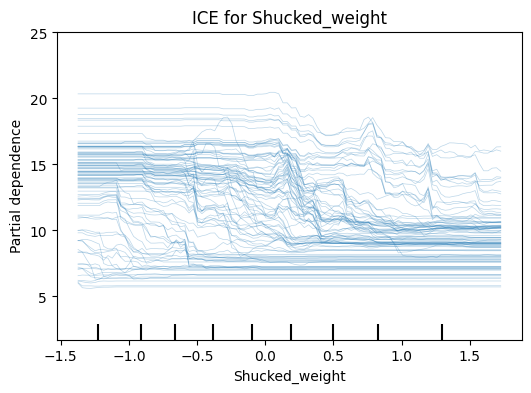

In [ ]:
# ICE (individual curves) for Whole_weight
fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['Whole_weight'],
    kind="individual",
    subsample=100,
    ax=ax
)
plt.title("ICE for Whole_weight")
plt.show()


# 4ICE for Shucked_weight
fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['Shucked_weight'],
    kind="individual",
    subsample=100,
    ax=ax
)
plt.title("ICE for Shucked_weight")
plt.show()

# this code snippet was generated using ChatGPT 5 on 27th September at 5:45pm.



# Interpreting the ICE plots

1. For whole weight

Few instances show a steep increase as displayed by the PDP plot but few instances have very minimal changes in predicted age and few remain flat. This is where PDP does not capture the whole story.

2. For Shucked weight

Few instances show a steep decrease as displayed by the PDP plot but few instances have very minimal changes in predicted age and few remain flat or have small ups and downs. This is where PDP does not capture the whole story.

# ALE plots

ALE plots work well multicollinear features. ALE corrects multicollinearity by computing local effects in the actual data distribution.

Shucked_weight,-1.614731,-1.373671,-1.224979,-1.071782,-0.909574,-0.781159,-0.659502,-0.522075,-0.382396,-0.244969,...,0.041149,0.187588,0.340785,0.496235,0.647179,0.820652,1.034677,1.293760,1.721811,5.085388
Whole_weight,,,,,,,,,,,,,,,,,,,,,
-1.686092,-0.487353,-0.358652,-0.080823,0.241306,0.333178,0.541996,0.971604,1.337047,1.169467,1.498413,...,1.922880,2.630187,3.441219,3.793450,4.265663,4.621012,4.869813,5.271879,5.348509,5.777561
-1.426063,-0.352210,-0.472566,-0.327236,-0.005107,0.086764,0.295582,0.725190,1.090633,0.923054,1.252000,...,1.676467,2.383773,3.194805,3.547037,4.019249,4.374598,4.623399,5.025465,5.102095,5.521147
-1.255770,-0.304397,-0.316752,-0.465625,-0.099607,0.036153,0.208048,0.600733,0.966176,0.798596,1.127542,...,1.552009,2.259316,3.070348,3.422579,3.894792,4.250140,4.498941,4.901008,4.977638,5.386690
-1.105871,-0.184061,-0.088416,-0.093957,-0.417374,-0.318537,-0.183565,0.211120,0.578563,0.410983,0.739929,...,1.164396,1.871703,2.682734,3.034966,3.507179,3.862527,4.111328,4.513395,4.590025,4.989077
-0.940676,-0.099962,0.139017,0.080676,-0.295541,-0.443751,-0.251810,0.144875,0.514318,0.492453,0.967113,...,1.391580,2.098886,2.909918,3.262150,3.734363,4.089711,4.338512,4.740579,4.817208,5.206260
-0.787718,-0.021336,0.217642,0.159301,-0.286916,-0.199293,-0.316299,-0.233186,0.281972,0.405821,0.880481,...,1.304948,2.012255,2.823286,3.175518,3.647731,4.003079,4.251880,4.653947,4.753077,5.132128
-0.668411,-0.157249,0.081730,0.023389,-0.176162,0.158128,-0.077878,-0.341698,-0.210494,-0.114145,0.360516,...,0.784983,1.492289,2.303321,2.655553,3.127765,3.483114,3.776200,4.222553,4.344182,4.713234
-0.511374,-0.851392,-0.612414,-0.670754,-0.623638,-0.082682,-0.112021,-0.154174,-0.287648,-0.200811,0.254683,...,0.675816,1.383123,2.194154,2.546386,2.981099,3.380733,3.718106,4.084458,4.228587,4.587639
-0.377791,-0.938469,-0.699491,-0.511164,-0.399049,0.206908,0.242569,0.267558,-0.137231,-0.285667,-0.105590,...,0.379044,1.073850,1.847382,2.162114,2.641112,3.085032,3.342404,3.731257,3.897886,4.246938


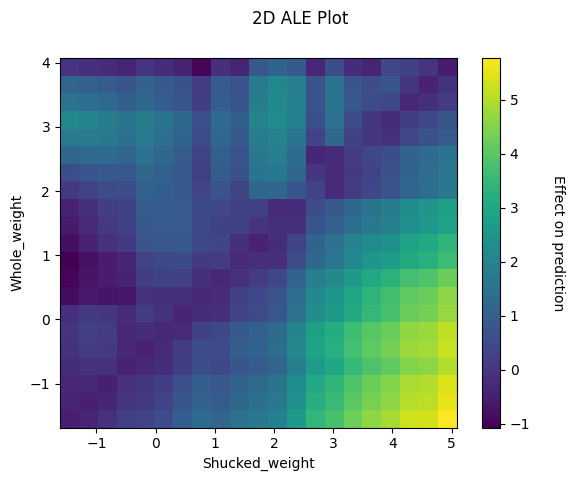

In [ ]:
from PyALE import ale


# ALE plots
ale(X_train, model, ['Whole_weight', 'Shucked_weight'], grid_size=20)


# Interpreting the ALE plot

At low Shucked_weight, changing Whole_weight doesn’t move prediction much. But at high Shucked_weight, increasing Whole_weight is moving predictions strongly up. This looks like the effect of Whole_weight is stronger when Shucked_weight is also high. Since Whole_weight and Shucked_weight are highly collinear (we saw it in the scatter plot), a PDP would have been misleading.
ALE corrects for this by computing local effects in the actual data distribution. 

So : The strongest increase in predicted age happens when both weights are high simultaneously.

# Conclusion

Dealing with a dataset with multicollinearity, PDP and ICE plots are not apt as they assume the features work independently. For example in our case, we saw that PDP which gives us the average effect of the feature on the prediction which is quite generalised. PDP also showed us a negative trend for shucked weight which was actually wrong because of the high collinearity with whole weight. ICE gives us a more clear picture of how each instance behaved with the changes in the feature but even this was not good at treating collinear features. The ALE plot on the other hand was a great indicator of the synergy between whole weight and shucked weight and captured local effects well. 